In [67]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
from os import path,listdir
from collections import deque
from PIL import Image

In [2]:
CURRENT_DIR = path.abspath(path.curdir)

In [101]:
class LinearModel():
    
    def __init__(self,input_dim,output_dim):
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.matrix = np.random.rand(self.input_dim,self.output_dim)
        self.bias = np.random.uniform(-1,1)
        
    def predict(self,observation):
        
        return np.sum([self.matrix[i]*observation[i] for i in range(self.input_dim)],axis=0) + self.bias
    
    def update(self,instance,lr):
        
        state = instance[:4]
        action = instance[4]
        reward = instance[5]
        
        forward_feed = [self.matrix[i][action]*state[i] for i in range(self.input_dim)]
        error = reward - (np.sum(forward_feed) + self.bias)
        adjustment = error*lr
        
        self.bias += adjustment
        self.matrix[:,action] += np.asarray(state)*adjustment

In [106]:
class CartpoleAgent():
    
    def __init__(self,minmem,maxmem):
        
        self.minmem = minmem
        self.maxmem = maxmem
        self.memory = deque([], maxlen=self.maxmem)
        self.epsilon = 1
        self.decay = 0.995
        self.gamma = 0.95
        self.lr = 0.001
        
        self.env = gym.make("CartPole-v1")
        self.model = LinearModel(4,2)

        self.scores = []
        self.means = []
        self.losses = []

    def predict(self,observation):
        
        return self.model.predict(observation)
    
    def remember(self,batch_size):
        
        return random.sample(self.memory,batch_size)
    
    def train(self,epochs,num_games,batch_size):
        
        e = 0
        
        while e<epochs:
            
            for _ in range(num_games):
            
                done = False
                observation = self.env.reset()
                trainexamples = []
                session_score = 0

                while not done:

                    if np.random.uniform(0,1)>self.epsilon:
                        action = np.argmax(self.model.predict(observation))
                    else:                    
                        action = self.env.action_space.sample()

                    session_score += 1
                    next_state, reward, done, info = self.env.step(action)
                    trainexamples.append([observation,action,-100 if done and session_score<500 else 1,next_state])
                    observation = next_state

                self.scores.append(session_score)

                current_reward = 0
                for example in reversed(trainexamples):
                    current_reward = example[2] + self.gamma*current_reward
                    self.memory.append([example[0][0],example[0][1],example[0][2],example[0][3],example[1],current_reward])                 
                     
                    
            mean = np.mean(self.scores[-num_games:])
            print(f'Epoch {e+1} had a mean score of {mean} over {num_games} games.')
            self.means.append(mean)
            
                
            
            self.epsilon = max(0.05,self.decay*self.epsilon)
            
            if len(self.memory)>self.minmem:
                
                batch = self.remember(batch_size)
                for b in batch:
                    self.model.update(b,self.lr)
                    
                e += 1
        
        

In [107]:
agent = CartpoleAgent(minmem=10000,maxmem=100000)
agent.train(epochs=1000,num_games=100,batch_size=1024)

Epoch 1 had a mean score of 22.59 over 100 games.
Epoch 1 had a mean score of 22.38 over 100 games.
Epoch 1 had a mean score of 21.73 over 100 games.
Epoch 1 had a mean score of 22.68 over 100 games.
Epoch 1 had a mean score of 23.07 over 100 games.
Epoch 2 had a mean score of 23.29 over 100 games.
Epoch 3 had a mean score of 23.11 over 100 games.
Epoch 4 had a mean score of 23.33 over 100 games.
Epoch 5 had a mean score of 22.71 over 100 games.
Epoch 6 had a mean score of 22.35 over 100 games.
Epoch 7 had a mean score of 22.69 over 100 games.
Epoch 8 had a mean score of 25.83 over 100 games.
Epoch 9 had a mean score of 22.61 over 100 games.
Epoch 10 had a mean score of 23.09 over 100 games.
Epoch 11 had a mean score of 24.49 over 100 games.
Epoch 12 had a mean score of 26.64 over 100 games.
Epoch 13 had a mean score of 25.66 over 100 games.
Epoch 14 had a mean score of 25.19 over 100 games.
Epoch 15 had a mean score of 26.1 over 100 games.
Epoch 16 had a mean score of 27.06 over 100 g

Epoch 158 had a mean score of 37.56 over 100 games.
Epoch 159 had a mean score of 33.09 over 100 games.
Epoch 160 had a mean score of 12.21 over 100 games.
Epoch 161 had a mean score of 39.64 over 100 games.
Epoch 162 had a mean score of 38.85 over 100 games.
Epoch 163 had a mean score of 32.84 over 100 games.
Epoch 164 had a mean score of 43.6 over 100 games.
Epoch 165 had a mean score of 51.27 over 100 games.
Epoch 166 had a mean score of 52.1 over 100 games.
Epoch 167 had a mean score of 52.65 over 100 games.
Epoch 168 had a mean score of 51.7 over 100 games.
Epoch 169 had a mean score of 54.79 over 100 games.
Epoch 170 had a mean score of 54.72 over 100 games.
Epoch 171 had a mean score of 56.25 over 100 games.
Epoch 172 had a mean score of 54.7 over 100 games.
Epoch 173 had a mean score of 54.02 over 100 games.
Epoch 174 had a mean score of 55.37 over 100 games.
Epoch 175 had a mean score of 56.92 over 100 games.
Epoch 176 had a mean score of 59.37 over 100 games.
Epoch 177 had a 

Epoch 316 had a mean score of 57.57 over 100 games.
Epoch 317 had a mean score of 48.86 over 100 games.
Epoch 318 had a mean score of 46.11 over 100 games.
Epoch 319 had a mean score of 48.0 over 100 games.
Epoch 320 had a mean score of 48.55 over 100 games.
Epoch 321 had a mean score of 46.4 over 100 games.
Epoch 322 had a mean score of 43.78 over 100 games.
Epoch 323 had a mean score of 43.58 over 100 games.
Epoch 324 had a mean score of 39.77 over 100 games.
Epoch 325 had a mean score of 39.16 over 100 games.
Epoch 326 had a mean score of 38.97 over 100 games.
Epoch 327 had a mean score of 32.18 over 100 games.
Epoch 328 had a mean score of 33.09 over 100 games.
Epoch 329 had a mean score of 34.43 over 100 games.
Epoch 330 had a mean score of 33.49 over 100 games.
Epoch 331 had a mean score of 31.51 over 100 games.
Epoch 332 had a mean score of 32.43 over 100 games.
Epoch 333 had a mean score of 30.86 over 100 games.
Epoch 334 had a mean score of 30.58 over 100 games.
Epoch 335 had 

Epoch 475 had a mean score of 57.63 over 100 games.
Epoch 476 had a mean score of 54.5 over 100 games.
Epoch 477 had a mean score of 53.01 over 100 games.
Epoch 478 had a mean score of 51.57 over 100 games.
Epoch 479 had a mean score of 48.56 over 100 games.
Epoch 480 had a mean score of 45.18 over 100 games.
Epoch 481 had a mean score of 47.32 over 100 games.
Epoch 482 had a mean score of 52.4 over 100 games.
Epoch 483 had a mean score of 45.56 over 100 games.
Epoch 484 had a mean score of 48.04 over 100 games.
Epoch 485 had a mean score of 48.04 over 100 games.
Epoch 486 had a mean score of 46.68 over 100 games.
Epoch 487 had a mean score of 41.76 over 100 games.
Epoch 488 had a mean score of 43.95 over 100 games.
Epoch 489 had a mean score of 43.58 over 100 games.
Epoch 490 had a mean score of 40.45 over 100 games.
Epoch 491 had a mean score of 40.44 over 100 games.
Epoch 492 had a mean score of 37.81 over 100 games.
Epoch 493 had a mean score of 39.37 over 100 games.
Epoch 494 had 

Epoch 633 had a mean score of 42.62 over 100 games.
Epoch 634 had a mean score of 43.93 over 100 games.
Epoch 635 had a mean score of 40.99 over 100 games.
Epoch 636 had a mean score of 42.43 over 100 games.
Epoch 637 had a mean score of 39.17 over 100 games.
Epoch 638 had a mean score of 38.83 over 100 games.
Epoch 639 had a mean score of 42.04 over 100 games.
Epoch 640 had a mean score of 39.14 over 100 games.
Epoch 641 had a mean score of 39.55 over 100 games.
Epoch 642 had a mean score of 36.31 over 100 games.
Epoch 643 had a mean score of 40.01 over 100 games.
Epoch 644 had a mean score of 40.99 over 100 games.
Epoch 645 had a mean score of 38.92 over 100 games.
Epoch 646 had a mean score of 39.88 over 100 games.
Epoch 647 had a mean score of 38.39 over 100 games.
Epoch 648 had a mean score of 40.01 over 100 games.
Epoch 649 had a mean score of 34.41 over 100 games.
Epoch 650 had a mean score of 34.94 over 100 games.
Epoch 651 had a mean score of 34.33 over 100 games.
Epoch 652 ha

Epoch 792 had a mean score of 36.23 over 100 games.
Epoch 793 had a mean score of 34.01 over 100 games.
Epoch 794 had a mean score of 36.36 over 100 games.
Epoch 795 had a mean score of 34.84 over 100 games.
Epoch 796 had a mean score of 35.52 over 100 games.
Epoch 797 had a mean score of 37.6 over 100 games.
Epoch 798 had a mean score of 37.56 over 100 games.
Epoch 799 had a mean score of 39.37 over 100 games.
Epoch 800 had a mean score of 42.03 over 100 games.
Epoch 801 had a mean score of 45.53 over 100 games.
Epoch 802 had a mean score of 43.45 over 100 games.
Epoch 803 had a mean score of 45.6 over 100 games.
Epoch 804 had a mean score of 44.27 over 100 games.
Epoch 805 had a mean score of 42.76 over 100 games.
Epoch 806 had a mean score of 40.62 over 100 games.
Epoch 807 had a mean score of 44.35 over 100 games.
Epoch 808 had a mean score of 46.77 over 100 games.
Epoch 809 had a mean score of 43.15 over 100 games.
Epoch 810 had a mean score of 45.2 over 100 games.
Epoch 811 had a

Epoch 951 had a mean score of 46.34 over 100 games.
Epoch 952 had a mean score of 40.74 over 100 games.
Epoch 953 had a mean score of 41.98 over 100 games.
Epoch 954 had a mean score of 45.18 over 100 games.
Epoch 955 had a mean score of 43.42 over 100 games.
Epoch 956 had a mean score of 43.4 over 100 games.
Epoch 957 had a mean score of 41.03 over 100 games.
Epoch 958 had a mean score of 43.22 over 100 games.
Epoch 959 had a mean score of 42.36 over 100 games.
Epoch 960 had a mean score of 40.31 over 100 games.
Epoch 961 had a mean score of 38.33 over 100 games.
Epoch 962 had a mean score of 38.1 over 100 games.
Epoch 963 had a mean score of 39.45 over 100 games.
Epoch 964 had a mean score of 36.48 over 100 games.
Epoch 965 had a mean score of 37.51 over 100 games.
Epoch 966 had a mean score of 36.84 over 100 games.
Epoch 967 had a mean score of 36.71 over 100 games.
Epoch 968 had a mean score of 37.65 over 100 games.
Epoch 969 had a mean score of 39.24 over 100 games.
Epoch 970 had 

In [46]:
observation = agent.env.reset()
agent.predict(observation)

array([-50.34962284, -48.74600192])

In [54]:
agent.model.matrix

array([[-1.13424663,  0.75367179],
       [ 0.40093896, -2.69281956],
       [ 2.04290192, -0.84987059],
       [-0.6945049 ,  0.51686013]])

In [38]:
agent.memory[int(len(agent.memory)/2)]

[-0.011542690201765533,
 -0.23496027379575243,
 0.07049689554377574,
 0.403871937625794,
 0,
 -59.61045175468748]

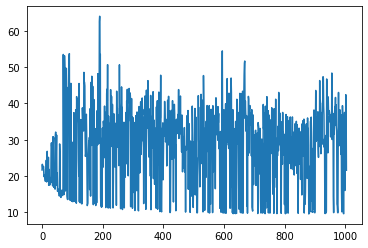

In [94]:
plt.plot(agent.means)

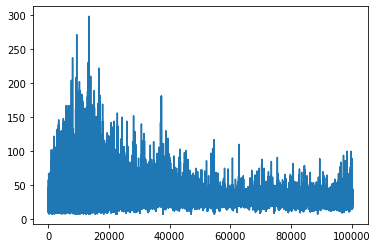

In [9]:
plt.plot(agent.scores);

In [302]:
batch = agent.remember(10)

In [304]:
for b in batch:
    
    print(b)

[0.0206291488032198, -0.016437292879548704, 0.02905021554851541, 0.06371671424606956, 1, -25.282432304236888]
[0.02517034341073593, -0.01582110935342057, 0.021060805139936932, 0.05010892036132031, 0, -20.86739515457379]
[0.02157707746308123, 0.17966329738273504, 0.02607446595268179, -0.2506830406372429, 0, -18.824025396845098]
[0.023865530269836732, -0.017285636333221305, 0.02593132998874253, 0.08243121108478363, 1, -30.174440226301265]
[0.026368403398054893, -0.014548968441938752, 0.018545778199653487, 0.022039138279259532, 0, -13.286748774620062]
[0.023519817543172308, 0.17745518065995106, 0.027579954210438202, -0.2019588505393886, 1, -32.81520023821186]
[0.026077424029216117, -0.20993190689604938, 0.018986560965238677, 0.32051529277376445, 1, -15.038682920652697]
[0.024853921223667516, -0.21123862102238583, 0.022062983547163337, 0.34936160006760375, 1, -23.018310689025043]
[0.02187878589129513, -0.015085421410695049, 0.025396866820713966, 0.033879956598391214, 1, -16.88282412700284]

In [284]:
states = batch[:,:4]
actions = batch[:,4]
rewards=  batch[:,5]

In [264]:
states

array([[-2.59495357e-02, -4.62786981e-02, -2.79733375e-02,
        -2.81256781e-02],
       [ 6.00376492e-03, -3.96358985e-02, -9.84729933e-02,
        -1.75450507e-01],
       [-6.18859684e-03,  3.45896822e-01, -6.64383834e-02,
        -6.57274850e-01],
       [ 5.21104695e-03, -2.33220756e-01, -1.01982003e-01,
         8.46157392e-02],
       [-2.38904495e-02,  3.44749316e-01, -3.51258830e-02,
        -6.31045057e-01],
       [ 3.76453003e-03, -4.21477896e-02, -8.73084780e-02,
        -1.19662496e-01],
       [ 7.29339598e-04,  1.51759522e-01, -7.95838804e-02,
        -3.86229882e-01],
       [-2.68751096e-02,  1.49233009e-01, -2.85358511e-02,
        -3.29501594e-01],
       [ 2.92157424e-03,  1.54109534e-01, -8.97017279e-02,
        -4.38563270e-01],
       [-1.69954631e-02,  5.40343315e-01, -4.77467841e-02,
        -9.34579963e-01]])

In [285]:
actions

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0.])

In [265]:
model = LinearModel(4,2)

In [266]:
actions[0]

1.0

In [287]:
[model.matrix[i][int(actions[0])]*states[0][i] for i in range(4)]

[-0.00041694842300637076,
 -0.015008296760766204,
 0.0030807673352571097,
 0.3033321730884737]

In [94]:
np.sum([self.matrix[i]*observation[i] for i in range(self.input_dim)],axis=0) + self.bias

array([0.07605915, 0.35681792, 0.7202194 , 0.3032256 ])

In [90]:
copy = test.matrix.copy()

In [96]:
copy = test.matrix.copy()
copy[tuple([[i for i in range(4)],[0,1,1,0]])] = 1
copy

array([[1.        , 0.04052481],
       [0.25649101, 1.        ],
       [0.2187364 , 1.        ],
       [1.        , 0.42423704]])

In [305]:
b = batch[0]
b

[0.0206291488032198,
 -0.016437292879548704,
 0.02905021554851541,
 0.06371671424606956,
 1,
 -25.282432304236888]

In [306]:
b[4]

1

In [363]:
forward_feed = [model.matrix[i][b[4]]*b[:4][i] for i in range(4)]
forward_feed

[0.013116089628921298,
 -0.018228475582010472,
 0.018935598979947652,
 0.02783206861738824]

In [330]:
error = b[5] - (np.sum(forward_feed) + model.bias)
error

-24.49722454340788

In [364]:
error = b[5] - (np.sum(forward_feed) + model.bias)
error

-24.454701302387264

In [331]:
adjustment = error*agent.lr
adjustment

-0.24497224543407883

In [310]:
model.bias += adjustment

In [318]:
np.asarray(b[:4])

array([ 0.02062915, -0.01643729,  0.02905022,  0.06371671])

In [322]:
np.asarray(b[:4])*adjustment + model.matrix[:,b[4]]

array([0.79751821, 0.98011666, 0.8795513 , 0.93629286])

In [362]:
model.matrix[:,b[4]] += np.asarray(b[:4])*adjustment

In [27]:
env = gym.make('CartPole-v1')

In [60]:
agent.bestmean

124.37

In [85]:
observation = env.reset()
frames = []
locations = []
for t in range(1000):
    #Render to frames buffer
    frames.append(env.render(mode="rgb_array"))
    locations.append(observation[2:])
#     action = np.argmax(np.sum([agent.bestmatrix[i]*observation[i] for i in range(agent.model.input_dim)],axis=0) + agent.bestbias)
    action = np.argmax(agent.predict(observation))
    print(f'{agent.predict(observation)} {action}')
    observation, _, done, _ = env.step(action)
    if done:
        break
env.close()
# save_frames_as_gif(frames)
print("")
print(len(frames))

[-50.60464996 -49.68406928] 1
[-50.91955932 -50.54203952] 1
[-51.0857836  -51.50078431] 0
[-50.44294241 -50.79046962] 0
[-49.95306362 -49.99593175] 0
[-49.6158495  -49.10848434] 1
[-50.09042945 -49.89949391] 1
[-50.41377207 -50.78329947] 0
[-49.92663812 -49.98869666] 0
[-49.59198467 -49.10115503] 1
[-50.0689579  -49.89203073] 1
[-50.39454175 -50.77566796] 0
[-49.90951539 -49.98082951] 0
[-49.57684794 -49.09301516] 1
[-50.05569893 -49.88357048] 1
[-50.38306416 -50.76684426] 0
[-49.89973652 -49.97157826] 0
[-49.56869516 -49.08328813] 1
[-50.04911049 -49.87331014] 1
[-50.37798813 -50.75599467] 0
[-49.89613179 -49.96007006] 0
[-49.56652958 -49.07105747] 1
[-50.04836128 -49.86028539] 1
[-50.37864145 -50.74210164] 0
[-49.898183   -49.94522637] 0
[-49.56998275 -49.05517767] 1
[-50.05322931 -49.84327744] 1
[-50.38494621 -50.72386598] 0
[-49.90595493 -49.9256594 ] 0
[-49.57926168 -49.03416436] 1
[-50.06406423 -49.8206965 ] 1
[-50.39739603 -50.69958305] 0
[-49.92008734 -49.89954002] 1
[-50.25362

[-49.4430778  -49.13031588] 1
[-49.92410755 -49.92744929] 0
[-49.59433088 -49.03690228] 1
[-50.07616235 -49.824494  ] 1
[-50.40661671 -50.70454979] 0
[-49.92650363 -49.90581174] 1
[-50.25729129 -50.79463291] 0
[-49.77657079 -50.00519024] 0
[-49.4473345  -49.12314141] 1
[-49.92877771 -49.91975312] 1
[-50.25790936 -50.8095184 ] 0
[-49.77554718 -50.02110962] 0
[-49.44467315 -49.14018933] 1
[-49.92447212 -49.93803234] 0
[-49.59347464 -49.04826054] 1
[-50.07408752 -49.83669884] 1
[-50.40331777 -50.71767756] 0
[-49.92196747 -49.91994363] 1
[-50.25149694 -50.80985691] 0
[-49.76948953 -50.02160005] 0
[-49.43892942 -49.14083972] 1
[-49.91900443 -49.93884399] 0
[-49.58824664 -49.0492429 ] 1
[-50.06906458 -49.83786026] 1
[-50.39846656 -50.71902958] 0
[-49.9172566  -49.92149239] 0
[-49.58842769 -49.03073843] 1
[-50.07116341 -49.81809497] 1
[-50.40248422 -50.69788881] 0
[-49.92320626 -49.89885275] 1
[-50.25480267 -50.78734558] 0
[-49.7748699  -49.99753982] 0
[-49.44640526 -49.11509255] 1
[-49.92860

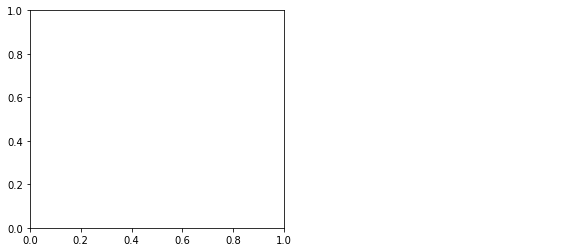

In [86]:
x,y = np.meshgrid(np.linspace(-0.2,0.2,20),np.linspace(-1.5,1.5,20))

speedx = x.copy()

for i in range(20):
    for j in range(20):
        
        speedx[i,j] = math.sin(speedx[i,j])

u = y
v = speedx

model = "Linear"

f,axi = plt.subplots(1,2,figsize=(10,4))
axi[1].axis("off")

for i,frame in enumerate(frames):

    axi[0].quiver(x,y,u,v)
    axi[0].scatter(locations[i][0],locations[i][1],s=50,c='r')
    axi[0].set_title("Phase Space Diagram")
    axi[0].set_xlabel("Pole Angle")
    axi[0].set_ylabel("Pole Angular Velocity")
    axi[0].set_xlim([-0.2,0.2])
    axi[0].set_ylim([-1.5,1.5])

    axi[1].imshow(frame)
    axi[1].set_title(model)
    axi[1].text(400,100,f'Score = {i+1}',size=20)


    f.savefig(f'pieces/{model} {i}.png')
    
    axi[0].cla()
    axi[1].cla()
    axi[1].axis("off");


In [65]:
model

'Linear'

In [87]:
images = [Image.open(f'pieces/{model} {i}.png') for i in range(len(listdir("pieces")))]

im = Image.new('RGB', (720,288))
im.save('graphics/linear_model_random.gif', save_all=True, append_images=images,loop=0)

In [1]:
plt.plot(agent.means)

plt.title("Linear Model with Agency")
plt.xlabel("Epochs")
plt.ylabel("Mean Score over 100 Games")
plt.ylim([0,500])

for i in range(4):
    
    epoch = (i+1)*200
    plt.axvline(epoch,color="r",linestyle= "--",lw=0.2)

    plt.text(epoch+5,400-(i*50),f'\u03B5={round(1-np.power(0.995,epoch),3)}',c="r")
    
# plt.savefig("graphics/LinearModelTrainingwAgency.png")
plt.show();

NameError: name 'plt' is not defined

In [89]:
agent.model.matrix

array([[ -0.0830006 ,   3.61138221],
       [ -3.27227327,   4.03697507],
       [-26.20952222,  19.9596493 ],
       [ -1.05663271,   5.73364949]])

In [141]:
np.power(0.995,150)

0.4714787374216858